**Лабораторная 6. Логистическая регрессия**

Задание

Выбор датасета

Я на восьмой позиции в группе, поэтому использую датасет о пассажирах Титаника

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import itertools
from typing import Union
import warnings

eps = 1e-9

path = "/home/uvusibuneka/Desktop/СИИ/Module 2/lab6/titanic.csv"
df = pd.read_csv(path)

target_name = 'survived'
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


Предварительная обработка данных

In [2]:
target = df[target_name]
df = df.drop(columns=['name', 'ticket', 'home.dest'])
categorical, numerical = df.select_dtypes(include=['object']).columns, df.select_dtypes(include=['int64', 'float64']).columns
df[numerical] = df[numerical].fillna(df[numerical].mean())
#df = df[categorical].dropna()
df[categorical] = df[categorical].fillna("unknown")
df

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,boat,body
0,1,1,female,29.000000,0,0,211.3375,B5,S,2,160.809917
1,1,1,male,0.916700,1,2,151.5500,C22 C26,S,11,160.809917
2,1,0,female,2.000000,1,2,151.5500,C22 C26,S,unknown,160.809917
3,1,0,male,30.000000,1,2,151.5500,C22 C26,S,unknown,135.000000
4,1,0,female,25.000000,1,2,151.5500,C22 C26,S,unknown,160.809917
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,female,14.500000,1,0,14.4542,unknown,C,unknown,328.000000
1305,3,0,female,29.881135,1,0,14.4542,unknown,C,unknown,160.809917
1306,3,0,male,26.500000,0,0,7.2250,unknown,C,unknown,304.000000
1307,3,0,male,27.000000,0,0,7.2250,unknown,C,unknown,160.809917


Статистика по датасету

In [3]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,12.883199,1.041658,0.865560,51.738879,29.591544
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,160.809917
50%,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200,160.809917
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,160.809917
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


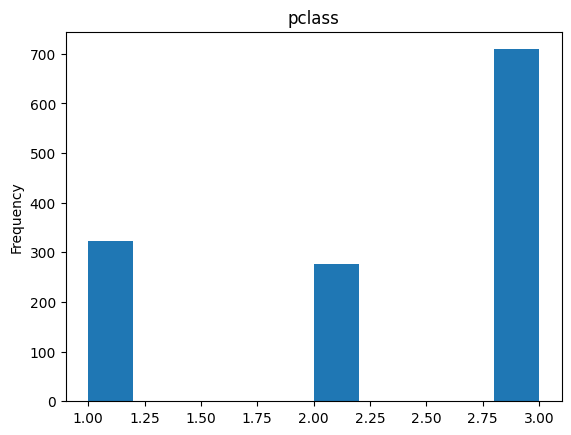

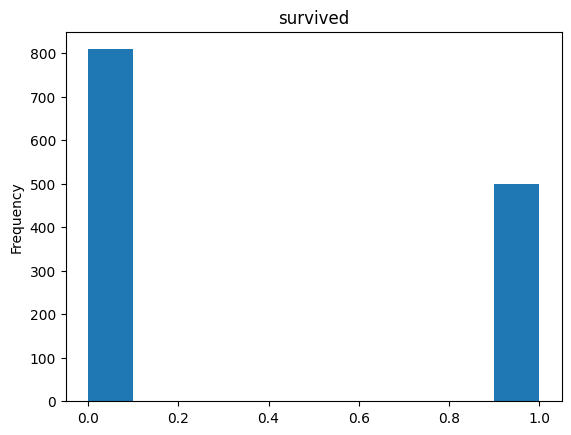

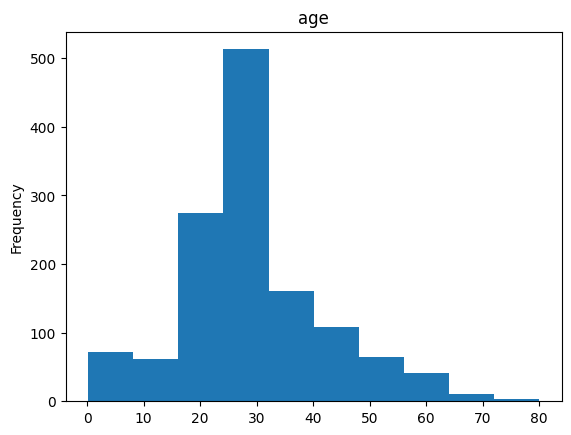

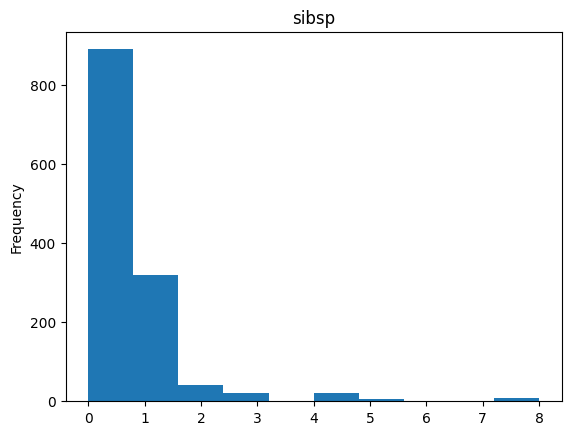

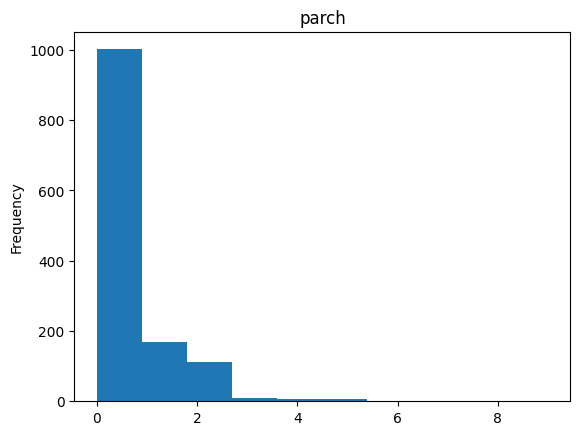

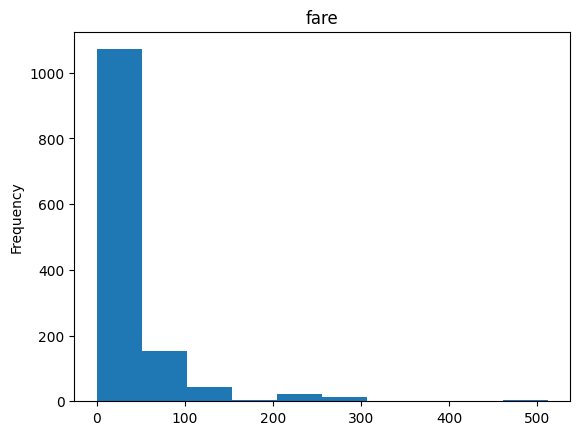

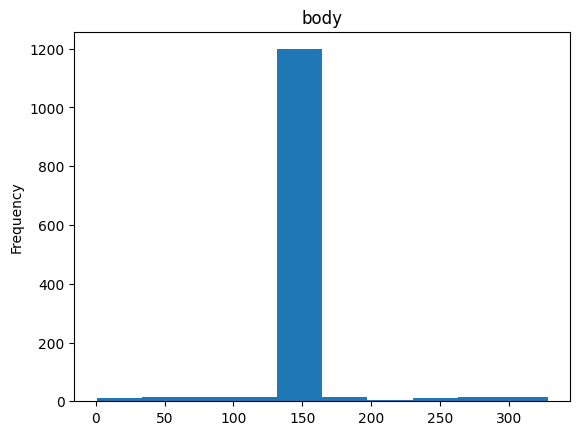

In [4]:
for f in df[numerical].columns:
    df[numerical][f].plot(kind="hist")
    plt.title(f)
    plt.show()

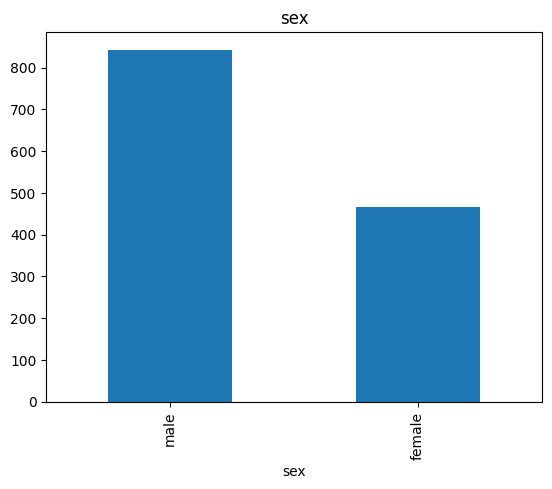

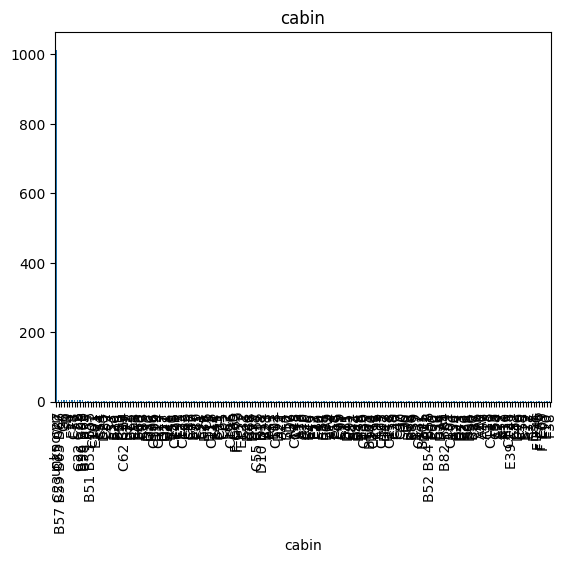

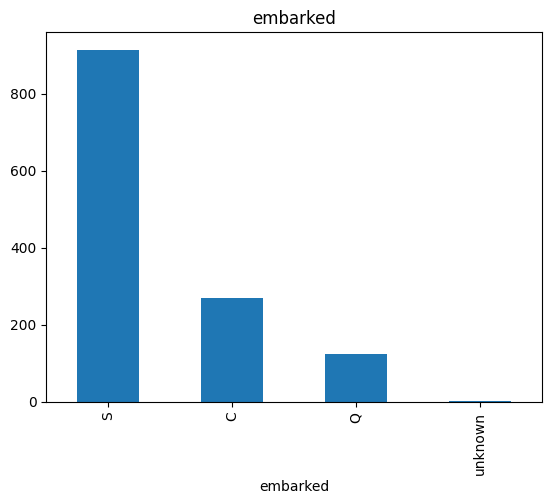

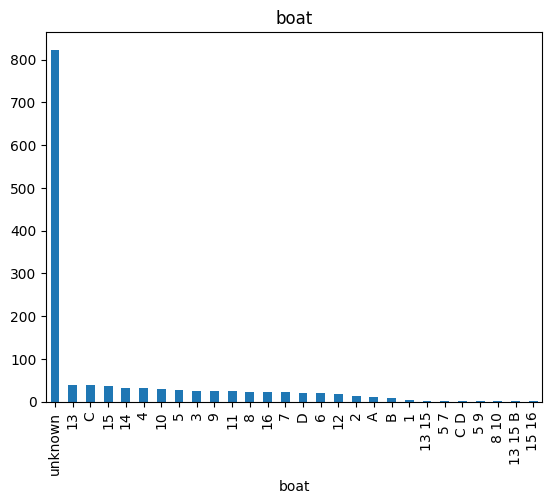

In [5]:
for f in df[categorical].columns:
    df[categorical][f].value_counts().plot(kind="bar")
    plt.title(f)
    plt.show()

Нормализуем выборку

In [6]:
df

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,boat,body
0,1,1,female,29.000000,0,0,211.3375,B5,S,2,160.809917
1,1,1,male,0.916700,1,2,151.5500,C22 C26,S,11,160.809917
2,1,0,female,2.000000,1,2,151.5500,C22 C26,S,unknown,160.809917
3,1,0,male,30.000000,1,2,151.5500,C22 C26,S,unknown,135.000000
4,1,0,female,25.000000,1,2,151.5500,C22 C26,S,unknown,160.809917
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,female,14.500000,1,0,14.4542,unknown,C,unknown,328.000000
1305,3,0,female,29.881135,1,0,14.4542,unknown,C,unknown,160.809917
1306,3,0,male,26.500000,0,0,7.2250,unknown,C,unknown,304.000000
1307,3,0,male,27.000000,0,0,7.2250,unknown,C,unknown,160.809917


In [7]:
numerical = list(numerical)
numerical.remove(target_name)
df[numerical] = (df[numerical] - df[numerical].min())/(df[numerical].max() - df[numerical].min())
df[target_name] = target
df['bias'] = 1

Закодируем категориальные признаки

In [8]:
df = pd.get_dummies(df, columns=categorical) # drop_first=True
df

,pclass,survived,age,sibsp,parch,fare,body,bias,sex_female,sex_male,...,boat_7,boat_8,boat_8 10,boat_9,boat_A,boat_B,boat_C,boat_C D,boat_D,boat_unknown
0,0.0,1,0.361169,0.000,0.000000,0.412503,0.488715,1,True,False,...,False,False,False,False,False,False,False,False,False,False
1,0.0,1,0.009395,0.125,0.222222,0.295806,0.488715,1,False,True,...,False,False,False,False,False,False,False,False,False,False
2,0.0,0,0.022964,0.125,0.222222,0.295806,0.488715,1,True,False,...,False,False,False,False,False,False,False,False,False,True
3,0.0,0,0.373695,0.125,0.222222,0.295806,0.409786,1,False,True,...,False,False,False,False,False,False,False,False,False,True
4,0.0,0,0.311064,0.125,0.222222,0.295806,0.488715,1,True,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1.0,0,0.179540,0.125,0.000000,0.028213,1.000000,1,True,False,...,False,False,False,False,False,False,False,False,False,True
1305,1.0,0,0.372206,0.125,0.000000,0.028213,0.488715,1,True,False,...,False,False,False,False,False,False,False,False,False,True
1306,1.0,0,0.329854,0.000,0.000000,0.014102,0.926606,1,False,True,...,False,False,False,False,False,False,False,False,False,True
1307,1.0,0,0.336117,0.000,0.000000,0.014102,0.488715,1,False,True,...,False,False,False,False,False,False,False,False,False,True


Разобьем выборку

In [9]:
df_train = df.sample(frac=0.8)
X_train, y_train = df_train.drop(target_name, axis=1), df_train[target_name]
X_test, y_test = df.drop(df_train.index).drop(target_name, axis=1), df.drop(df_train.index)[target_name]

Функцию для вычисления гипотезы (sigmoid function).

In [10]:
def sigmoid(x: float)->float:
    return 1/(1 + np.exp(-x))

def predict(X: pd.DataFrame, weights: np.array):
    return sigmoid(np.dot(X, weights))

Функцию для вычисления функции потерь (log loss).

In [11]:
def log_loss(y_predict: np.float64, y_actual: np.float64):
    return -(y_predict*np.log(y_actual) + (1 - y_predict)*np.log(1 - y_actual)).mean()

Метод обучения, который включает в себя градиентный спуск.

In [12]:
weights = np.random.rand(len(X_train.T))

def gradient_descent(X: pd.DataFrame, y: pd.Series, weights: np.array, epochs, lr=0.0001):
    for _ in range(epochs):
        y_predict = predict(X, weights)
        weights -= lr*np.dot(X.T, y_predict - y)/y.size
    return weights 


Соберем методы в отдельный класс

In [13]:
class log_regression_model:
    def __init__(self, epochs, df: pd.DataFrame, lr=0.0001, weights=None):
        self.epochs = epochs
        self.lr = lr
        if weights is not None:
            self.weights = weights
        else:
            self.weights = np.random.rand(len(df.columns))   

    def sigmoid(self, x: Union[float, np.ndarray]) -> Union[float, np.ndarray]:
        x = np.asarray(x)
        with warnings.catch_warnings(record=True) as w:
            warnings.simplefilter("always")   
            result = 1 / (1 + np.exp(-x))
            if len(w) > 0 and issubclass(w[-1].category, RuntimeWarning):
                if isinstance(x, float):
                    return 1 - 1e-10 if x > 0 else 1e-10
                else:
                    return np.where(x > 0, 1 - 1e-10, 1e-10)  
        
        return result.item() if isinstance(x, float) else result

    
    def predict(self, X: Union[np.ndarray, pd.DataFrame, pd.Series]) -> Union[np.ndarray, float]:
        if isinstance(X, pd.DataFrame) or isinstance(X, pd.Series):
            X = np.array(X, dtype=float)
        result = self.sigmoid(np.dot(X, self.weights))

        if isinstance(X, pd.Series):
            return float(result)

        return result

    def _gradient_descent(self, X: pd.DataFrame, y: pd.Series, epochs, lr=0.0001):
        y = np.array(y, dtype=float)
        X = np.array(X, dtype=float)
        for _ in range(epochs):
            y_predict = self.predict(X)
            gradient = np.dot(X.T, (y_predict - y))
            self.weights -= lr * gradient
    
    def _newton_optimization(self, X: pd.DataFrame, y: pd.Series, epochs):
        X = np.array(X, dtype=float)
        y = np.array(y, dtype=float)
        for _ in range(epochs):
            y_predict = self.predict(X)
            gradient = np.dot(X.T, (y_predict - y))
            S = np.diag((y_predict * (1 - y_predict)).flatten())
            H = np.dot(np.dot(X.T, S), X) / y.size
            self.weights -= np.array(np.linalg.pinv(H).dot(gradient))
    
    def fit(self, X: pd.DataFrame, y: pd.Series, method="gradient_descent"):
        if method == "gradient_descent":
            self.gradient_descent(X, y, self.epochs, self.lr)
        elif method == "newton":
            self.newton_optimization(X, y, self.epochs)
    
    def log_loss(self, y_predict: np.float64, y_actual: np.float64):
        return -(y_actual * np.log(y_predict) + (1 - y_actual) * np.log(1 - y_predict)).mean()

    def error_matrix(self, X_test: pd.DataFrame, y_test: pd.Series) -> pd.DataFrame:
        unique_classes = y_test.unique()

        m_err = pd.DataFrame(0, index=[f"Actual result is {round(y)}" for y in unique_classes],
                             columns=[f"Predicted result is {round(y)}" for y in unique_classes])

        for x, y in zip(X_test.iterrows(), y_test):
            actual_label = f"Actual result is {round(y)}"
            y_p = self.predict(x[1])
            if not isinstance(y_p, float):
                y_p = float(y_p)
            predicted_label = f"Predicted result is {round(y_p)}"
            m_err.at[actual_label, predicted_label] += 1

        return m_err
    
    def accuracy(self, X_test: pd.DataFrame, y_test: pd.Series) -> float:
        m_err = self.error_matrix(X_test, y_test)
        return m_err.values.diagonal().sum() / m_err.values.sum()
    
    def precision(self, X_test: pd.DataFrame, y_test: pd.Series) -> float:
        m_err = self.error_matrix(X_test, y_test)
        return m_err.values.diagonal() / m_err.values.sum(axis=1)
    
    def recall(self, X_test: pd.DataFrame, y_test: pd.Series) -> float:
        m_err = self.error_matrix(X_test, y_test)
        return m_err.values.diagonal() / m_err.values.sum(axis=1)
    
    def f1_score(self, X_test: pd.DataFrame, y_test: pd.Series) -> float:
        precision = self.precision(X_test, y_test)
        recall = self.recall(X_test, y_test)
        return 2 * precision * recall / (precision + recall + eps)


Исследование гиперпараметров:
Проведите исследование влияния гиперпараметров на производительность модели. Варьируйте следующие гиперпараметры: 
- Коэффициент обучения (learning rate).
- Количество итераций обучения.
- Метод оптимизации (например, градиентный спуск или оптимизация Ньютона).
Оценка модели:
Для каждой комбинации гиперпараметров оцените 
производительность модели на тестовом наборе данных, используя метрики, такие как accuracy, precision, recall и F1 Score.

In [14]:
model_gd = log_regression_model(epochs=500, df=pd.DataFrame(X_train), lr=0.0001)
model_gd.fit(X_train, y_train, method="gradient_descent")
accuracy_gd = model_gd.accuracy(X_test, y_test)
precision_gd = model_gd.precision(X_test, y_test).mean()
recall_gd = model_gd.recall(X_test, y_test).mean()
f1_score_gd = model_gd.f1_score(X_test, y_test).mean()
print(accuracy_gd, precision_gd, recall_gd, f1_score_gd)
model_gd.error_matrix(X_test, y_test)

0.9770992366412213 0.9745204014967037 0.9745204014967037 0.9745204009967037


,Predicted result is 1,Predicted result is 0
Actual result is 1,108,5
Actual result is 0,1,148


In [15]:
model_gd = log_regression_model(epochs=500, df=pd.DataFrame(X_train), lr=0.00001)
model_gd.fit(X_train, y_train, method="newton")
model_gd.error_matrix(X_test, y_test)

,Predicted result is 1,Predicted result is 0
Actual result is 1,94,19
Actual result is 0,11,138


In [16]:
accuracy_gd = model_gd.accuracy(X_test, y_test)
precision_gd = model_gd.precision(X_test, y_test).mean()
recall_gd = model_gd.recall(X_test, y_test).mean()
f1_score_gd = model_gd.f1_score(X_test, y_test).mean()
print(accuracy_gd, precision_gd, recall_gd, f1_score_gd)


0.8854961832061069 0.8790164518619706 0.8790164518619706 0.8790164513619706


Сделайте выводы о том, какие значения гиперпараметров наилучшим образом работают для данного набора данных и задачи классификации. Обратите внимание на изменение производительности модели при варьировании гиперпараметров.

In [17]:
lr = [0.00001, 0.0001, 0.001]
epochs = [100, 300, 500]

columns = ['lr', 'epochs', 'method', 'accuracy', 'precision', 'recall', 'f1_score']
results = pd.DataFrame(columns=columns)

for lr_value in lr:
    for epoch in epochs:
        model_gd = log_regression_model(epochs=epoch, df=pd.DataFrame(X_train), lr=lr_value)
        model_gd.fit(X_train, y_train, method="gradient_descent")
        y_pred_gd = model_gd.predict(X_test)
        accuracy_gd = model_gd.accuracy(X_test, y_test)
        precision_gd = model_gd.precision(X_test, y_test).mean()
        recall_gd = model_gd.recall(X_test, y_test).mean()
        f1_score_gd = model_gd.f1_score(X_test, y_test).mean()
        
        new_row = pd.DataFrame({
            'lr': [lr_value],
            'epochs': [epoch],
            'method': ['Gradient Descent'],
            'accuracy': [accuracy_gd],
            'precision': [precision_gd],
            'recall': [recall_gd],
            'f1_score': [f1_score_gd]
        })
        if results.empty:
            results = new_row
        else:
            results = pd.concat([results, new_row], ignore_index=True)
        
        model_newton = log_regression_model(epochs=epoch, df=pd.DataFrame(X_train), lr=lr_value)
        model_newton.fit(X_train, y_train, method="newton")
        y_pred_newton = model_newton.predict(X_test)
        accuracy_newton = model_newton.accuracy(X_test, y_test)
        precision_newton = model_newton.precision(X_test, y_test).mean()
        recall_newton = model_newton.recall(X_test, y_test).mean()
        f1_score_newton = model_newton.f1_score(X_test, y_test).mean()
        
        new_row = pd.DataFrame({
            'lr': [lr_value],
            'epochs': [epoch],
            'method': ['Newton'],
            'accuracy': [accuracy_newton],
            'precision': [precision_gd],
            'recall': [recall_gd],
            'f1_score': [f1_score_gd]
        })

        results = pd.concat([results, new_row], ignore_index=True)

print(results)

         lr  epochs            method  accuracy  precision    recall  f1_score
0   0.00001     100  Gradient Descent  0.431298   0.500000  0.500000  0.500000
1   0.00001     100            Newton  0.923664   0.500000  0.500000  0.500000
2   0.00001     300  Gradient Descent  0.843511   0.820722  0.820722  0.820722
3   0.00001     300            Newton  0.854962   0.820722  0.820722  0.820722
4   0.00001     500  Gradient Descent  0.851145   0.829572  0.829572  0.829572
5   0.00001     500            Newton  0.874046   0.829572  0.829572  0.829572
6   0.00010     100  Gradient Descent  0.935115   0.925848  0.925848  0.925848
7   0.00010     100            Newton  0.885496   0.925848  0.925848  0.925848
8   0.00010     300  Gradient Descent  0.946565   0.939122  0.939122  0.939122
9   0.00010     300            Newton  0.885496   0.939122  0.939122  0.939122
10  0.00010     500  Gradient Descent  0.977099   0.974520  0.974520  0.974520
11  0.00010     500            Newton  0.919847   0.

In [18]:
results

,lr,epochs,method,accuracy,precision,recall,f1_score
0,0.00001,100,Gradient Descent,0.431298,0.500000,0.500000,0.500000
1,0.00001,100,Newton,0.923664,0.500000,0.500000,0.500000
2,0.00001,300,Gradient Descent,0.843511,0.820722,0.820722,0.820722
3,0.00001,300,Newton,0.854962,0.820722,0.820722,0.820722
4,0.00001,500,Gradient Descent,0.851145,0.829572,0.829572,0.829572
5,0.00001,500,Newton,0.874046,0.829572,0.829572,0.829572
6,0.00010,100,Gradient Descent,0.935115,0.925848,0.925848,0.925848
7,0.00010,100,Newton,0.885496,0.925848,0.925848,0.925848
8,0.00010,300,Gradient Descent,0.946565,0.939122,0.939122,0.939122
9,0.00010,300,Newton,0.885496,0.939122,0.939122,0.939122


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>lr</th>
      <th>epochs</th>
      <th>method</th>
      <th>accuracy</th>
      <th>precision</th>
      <th>recall</th>
      <th>f1_score</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0.00001</td>
      <td>100</td>
      <td>Gradient Descent</td>
      <td>0.431298</td>
      <td>0.500000</td>
      <td>0.500000</td>
      <td>0.500000</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0.00001</td>
      <td>100</td>
      <td>Newton</td>
      <td>0.923664</td>
      <td>0.500000</td>
      <td>0.500000</td>
      <td>0.500000</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.00001</td>
      <td>300</td>
      <td>Gradient Descent</td>
      <td>0.843511</td>
      <td>0.820722</td>
      <td>0.820722</td>
      <td>0.820722</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.00001</td>
      <td>300</td>
      <td>Newton</td>
      <td>0.854962</td>
      <td>0.820722</td>
      <td>0.820722</td>
      <td>0.820722</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0.00001</td>
      <td>500</td>
      <td>Gradient Descent</td>
      <td>0.851145</td>
      <td>0.829572</td>
      <td>0.829572</td>
      <td>0.829572</td>
    </tr>
    <tr>
      <th>5</th>
      <td>0.00001</td>
      <td>500</td>
      <td>Newton</td>
      <td>0.874046</td>
      <td>0.829572</td>
      <td>0.829572</td>
      <td>0.829572</td>
    </tr>
    <tr>
      <th>6</th>
      <td>0.00010</td>
      <td>100</td>
      <td>Gradient Descent</td>
      <td>0.935115</td>
      <td>0.925848</td>
      <td>0.925848</td>
      <td>0.925848</td>
    </tr>
    <tr>
      <th>7</th>
      <td>0.00010</td>
      <td>100</td>
      <td>Newton</td>
      <td>0.885496</td>
      <td>0.925848</td>
      <td>0.925848</td>
      <td>0.925848</td>
    </tr>
    <tr>
      <th>8</th>
      <td>0.00010</td>
      <td>300</td>
      <td>Gradient Descent</td>
      <td>0.946565</td>
      <td>0.939122</td>
      <td>0.939122</td>
      <td>0.939122</td>
    </tr>
    <tr>
      <th>9</th>
      <td>0.00010</td>
      <td>300</td>
      <td>Newton</td>
      <td>0.885496</td>
      <td>0.939122</td>
      <td>0.939122</td>
      <td>0.939122</td>
    </tr>
    <tr>
      <th>10</th>
      <td>0.00010</td>
      <td>500</td>
      <td>Gradient Descent</td>
      <td>0.977099</td>
      <td>0.974520</td>
      <td>0.974520</td>
      <td>0.974520</td>
    </tr>
    <tr>
      <th>11</th>
      <td>0.00010</td>
      <td>500</td>
      <td>Newton</td>
      <td>0.919847</td>
      <td>0.974520</td>
      <td>0.974520</td>
      <td>0.974520</td>
    </tr>
    <tr>
      <th>12</th>
      <td>0.00100</td>
      <td>100</td>
      <td>Gradient Descent</td>
      <td>0.977099</td>
      <td>0.974520</td>
      <td>0.974520</td>
      <td>0.974520</td>
    </tr>
    <tr>
      <th>13</th>
      <td>0.00100</td>
      <td>100</td>
      <td>Newton</td>
      <td>0.866412</td>
      <td>0.974520</td>
      <td>0.974520</td>
      <td>0.974520</td>
    </tr>
    <tr>
      <th>14</th>
      <td>0.00100</td>
      <td>300</td>
      <td>Gradient Descent</td>
      <td>0.977099</td>
      <td>0.974520</td>
      <td>0.974520</td>
      <td>0.974520</td>
    </tr>
    <tr>
      <th>15</th>
      <td>0.00100</td>
      <td>300</td>
      <td>Newton</td>
      <td>0.935115</td>
      <td>0.974520</td>
      <td>0.974520</td>
      <td>0.974520</td>
    </tr>
    <tr>
      <th>16</th>
      <td>0.00100</td>
      <td>500</td>
      <td>Gradient Descent</td>
      <td>0.977099</td>
      <td>0.974520</td>
      <td>0.974520</td>
      <td>0.974520</td>
    </tr>
    <tr>
      <th>17</th>
      <td>0.00100</td>
      <td>500</td>
      <td>Newton</td>
      <td>0.896947</td>
      <td>0.974520</td>
      <td>0.974520</td>
      <td>0.974520</td>
    </tr>
  </tbody>
</table>
</div>